# Esercizio 11.1

In questo esercizio si richiede di modificare una rete neurale fornita per risolvere il problema di una regressione lineare di punti distribuiti su una retta con un certo rumore $\sigma$. Si generano quindi dei dati casuali così facendo:

$$
    y_i= f(x_i) + \eta_i,
$$
dove il rumore $\eta$ ha queste caratteristiche:

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

La rete neurale sostanzialmente viene addestrata su un set di dati di training, dove attraverso degli algoritmi il programma "impara" un modello (nel nostro caso un fit lineare). Una volta imparato il modello, si testa la rete neurale con un set di dati di test per vedere l'errore.
In questo esercizio si inizia a maneggiare una rete neurale già fatta modificandone i parametri fondamentali quali rumore, numero di dati di training e numero di epoche.


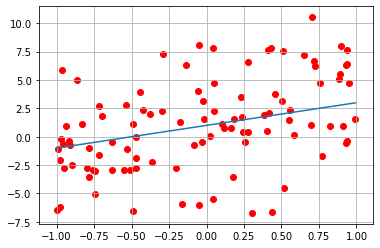

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 4.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()



In [119]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [120]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/60
32/32 [==============================] - 0s 4ms/step - loss: 15.9579 - mse: 15.9579 - val_loss: 14.0030 - val_mse: 14.0030
Epoch 2/60
32/32 [==============================] - 0s 2ms/step - loss: 15.4371 - mse: 15.4371 - val_loss: 13.6414 - val_mse: 13.6414
Epoch 3/60
32/32 [==============================] - 0s 2ms/step - loss: 15.2835 - mse: 15.2835 - val_loss: 13.4793 - val_mse: 13.4793
Epoch 4/60
32/32 [==============================] - 0s 2ms/step - loss: 15.2269 - mse: 15.2269 - val_loss: 13.3884 - val_mse: 13.3884
Epoch 5/60
32/32 [==============================] - 0s 2ms/step - loss: 15.2035 - mse: 15.2035 - val_loss: 13.3311 - val_mse: 13.3311
Epoch 6/60
32/32 [==============================] - 0s 2ms/step - loss: 15.1890 - mse: 15.1890 - val_loss: 13.2803 - val_mse: 13.2803
Epoch 7/60
32/32 [==============================] - 0s 2ms/step - loss: 15.1819 - mse: 15.1819 - val_loss: 13.2158 - val_mse: 13.2158
Epoch 8/60
32/32 [==============================] - 0s 2ms/ste

In [121]:
# return weights
model.get_weights()


[array([[2.0142176]], dtype=float32), array([1.04795], dtype=float32)]

In [122]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 13.1469 - mse: 13.1469

Test loss: 13.146855354309082
Test accuracy: 13.146855354309082


In [123]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023

Test loss: 0.0023243690375238657
Test accuracy: 0.0023243690375238657


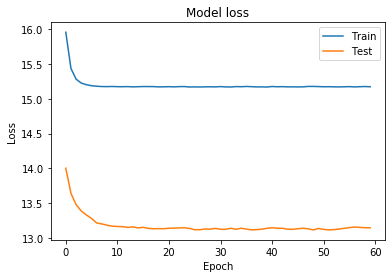

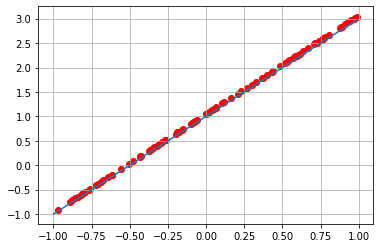

In [124]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Sono stati fatti vari test, provando con i seguenti valori e con annesso la perdita sul modello:

$\sigma$ = 1, $N_{\mathrm{epochs}}$ = 90, $N_{\mathrm{train}}$ = 1000, Test loss = 0.82, Test accuracy = 0.82

$\sigma$ = 1, $N_{\mathrm{epochs}}$ = 60, $N_{\mathrm{train}}$ = 1000, Test loss = 0.82, Test accuracy = 0.82

$\sigma$ = 1, $N_{\mathrm{epochs}}$ = 30, $N_{\mathrm{train}}$ = 1000, Test loss = 0.82, Test accuracy = 0.82

$\sigma$ = 1, $N_{\mathrm{epochs}}$ = 60, $N_{\mathrm{train}}$ = 10000, Test loss = 1.02, Test accuracy = 1.02

$\sigma$ = 1, $N_{\mathrm{epochs}}$ = 60, $N_{\mathrm{train}}$ = 500, Test loss = 0.83, Test accuracy = 0.83

$\sigma$ = 2, $N_{\mathrm{epochs}}$ = 60, $N_{\mathrm{train}}$ = 1000, Test loss = 3.28, Test accuracy = 3.28

$\sigma$ = 4, $N_{\mathrm{epochs}}$ = 60, $N_{\mathrm{train}}$ = 1000, Test loss = 13.15, Test accuracy = 13.15




Al variare dei valori si possono fare diverse osservazioni; in primo luogo si nota che variando il numero di epoche il valore della perdita rimane sostanzialmente la stessa. In secondo luogo si osserva come aumentare il numero di dati di training (stranamente) peggiora leggermente i risultati in termini di perdita. Invece aumentando la dispersione la perdita aumenta notevolmente, come ci si può aspettare.